# Checking the begining of the experiments

In [1]:
import os
import sys
sys.path.insert(0, '../')

import icenumerics as ice

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib as mpl
mpl.rc('text', usetex=True)
import string as st
import glob

idx = pd.IndexSlice

import pims as pm
from pims import pipeline
@pipeline

def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

In [2]:
#directory = "/Users/aortiza/Desktop/ShearedSquare"
directory = "C:/Users/aortiza/Desktop/ShearedSquare/Theta45"

In [3]:
theta = 45
filenames = [file for file in glob.glob(
    os.path.join(directory,('*_vertices.dat')))]
filenames

['C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_06_04_15_32_20_vertices.dat',
 'C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_06_04_16_15_15_vertices.dat',
 'C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_06_04_16_38_13_vertices.dat',
 'C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_06_04_17_10_34_vertices.dat',
 'C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_06_04_17_37_03_vertices.dat',
 'C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_06_05_15_22_05_vertices.dat',
 'C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_06_05_15_46_52_vertices.dat',
 'C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_06_05_16_12_51_vertices.dat',
 'C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_06_05_16_39_38_vertices.dat',
 'C:/Users/aortiza/Desktop/ShearedSquare/Theta45\\E5_M8_teta45_10um_2019_

In [4]:
vertices = pd.read_csv(os.path.join(directory,"vertices.dat"), sep="\t",index_col = [0,1])

In [5]:
vertices =  vertices[(vertices.Coordination==4) & (vertices.field<8)]

In [6]:
vertices_f0 = vertices.drop(vertices.loc[idx[2:4,:],:].index).loc[idx[:,0],:]

(array([ 24.,  81., 168., 116.,  14.]),
 array([-5, -3, -1,  1,  3,  5]),
 <a list of 5 Patch objects>)

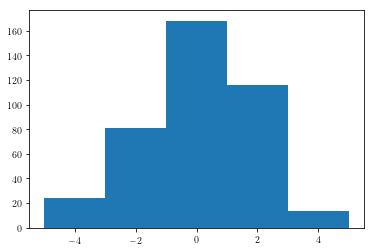

In [7]:
plt.hist(vertices_f0.Charge, bins=[-5,-3,-1,1,3,5])

In [8]:
vertices["type"] = np.NaN
n = np.array([np.cos(theta/2/180*np.pi),np.sin(theta/2/180*np.pi)])

vertices.loc[vertices.Charge==4,"type"] = "Type 6"
vertices.loc[vertices.Charge==-4,"type"] = "Type 1"

vertices.loc[vertices.Charge==2,"type"] = "Type 5"
vertices.loc[vertices.Charge==-2,"type"] = "Type 2"

vertices.loc[ 
    (vertices.Charge == 0) & (np.sqrt(vertices.DipoleX**2+vertices.DipoleY**2) < 0.1), "type"] = "Type 3"

cond = (vertices.Charge == 0) & (vertices.type!="Type 3")

vertices.loc[cond & (np.abs(vertices.DipoleX * n[0] + vertices.DipoleY * n[1] ) <= 0.2),"type"] = "Type 4b"
vertices.loc[cond & (np.abs(vertices.DipoleX * n[0] + vertices.DipoleY * n[1] ) > 0.2),"type"] = "Type 4a"


In [9]:
vertices.head()

id  Coordination  Charge   DipoleX   DipoleY   LocationX  \
file frame                                                             
0    0      15             4       2  1.394330 -1.433821  290.459582   
     0      17             4       2 -1.394330  1.433821  460.130516   
     0      18             4       2  1.394330 -1.433821  236.080704   
     0      19             4      -2  0.027924  1.999805  404.662588   
     0      21             4       0  1.422255  0.565984  571.066372   

             LocationY          time   initialtime  field     type  
file frame                                                          
0    0       91.536974  3.642500e+09  3.642500e+09    0.0   Type 5  
     0      391.734273  3.642500e+09  3.642500e+09    0.0   Type 5  
     0      147.456001  3.642500e+09  3.642500e+09    0.0   Type 5  
     0      369.660903  3.642500e+09  3.642500e+09    0.0   Type 2  
     0      435.881012  3.642500e+09  3.642500e+09    0.0  Type 4a

In [10]:
file = 0

name = filenames[file][:filenames[file].find("_vertices.dat")]
video = pm.open(name+".avi")

v_frame = vertices.loc[idx[file,0],:]
T5 = v_frame[v_frame.Charge==2]
T3 = v_frame[v_frame.Charge==-2]

trj = pd.read_csv(name+"_tracking.dat",sep="\t", index_col=[0,1])

disp_name = os.path.split(name)[1]
disp_name = disp_name.replace("_","\_")

C:\Users\aortiza\Anaconda3\lib\site-packages\pims\api.py:191: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
C:\Users\aortiza\Anaconda3\lib\site-packages\pims\api.py:191: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
C:\Users\aortiza\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Text(0.5, 1.0, 'E5\\_M8\\_teta45\\_10um\\_2019\\_06\\_04\\_15\\_32\\_20 \n$N_{q=-2} = 11$, $N_{q=2} = 17$')

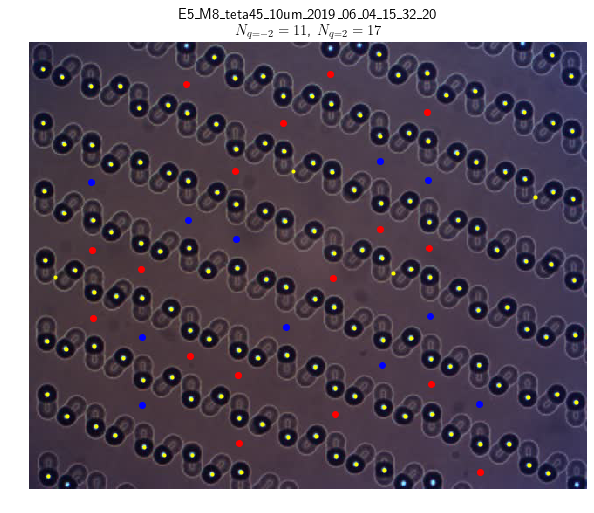

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.imshow(video[0])
plt.plot(T5.LocationX,T5.LocationY,'o',color="red")
plt.plot(T3.LocationX,T3.LocationY,'o',color="blue")
plt.plot(trj.loc[idx[0,:],"x"],trj.loc[idx[0,:],"y"],'.',color = "yellow")
ax.set_axis_off()
ax.set_title("%s \n$N_{q=-2} = %u$, $N_{q=2} = %u$"%(disp_name,len(T3),len(T5)),
            fontsize = 15)

In [12]:
disp_name = os.path.split(name)[1]
disp_name.replace("_","\_")

'E5\\_M8\\_teta45\\_10um\\_2019\\_06\\_04\\_15\\_32\\_20'

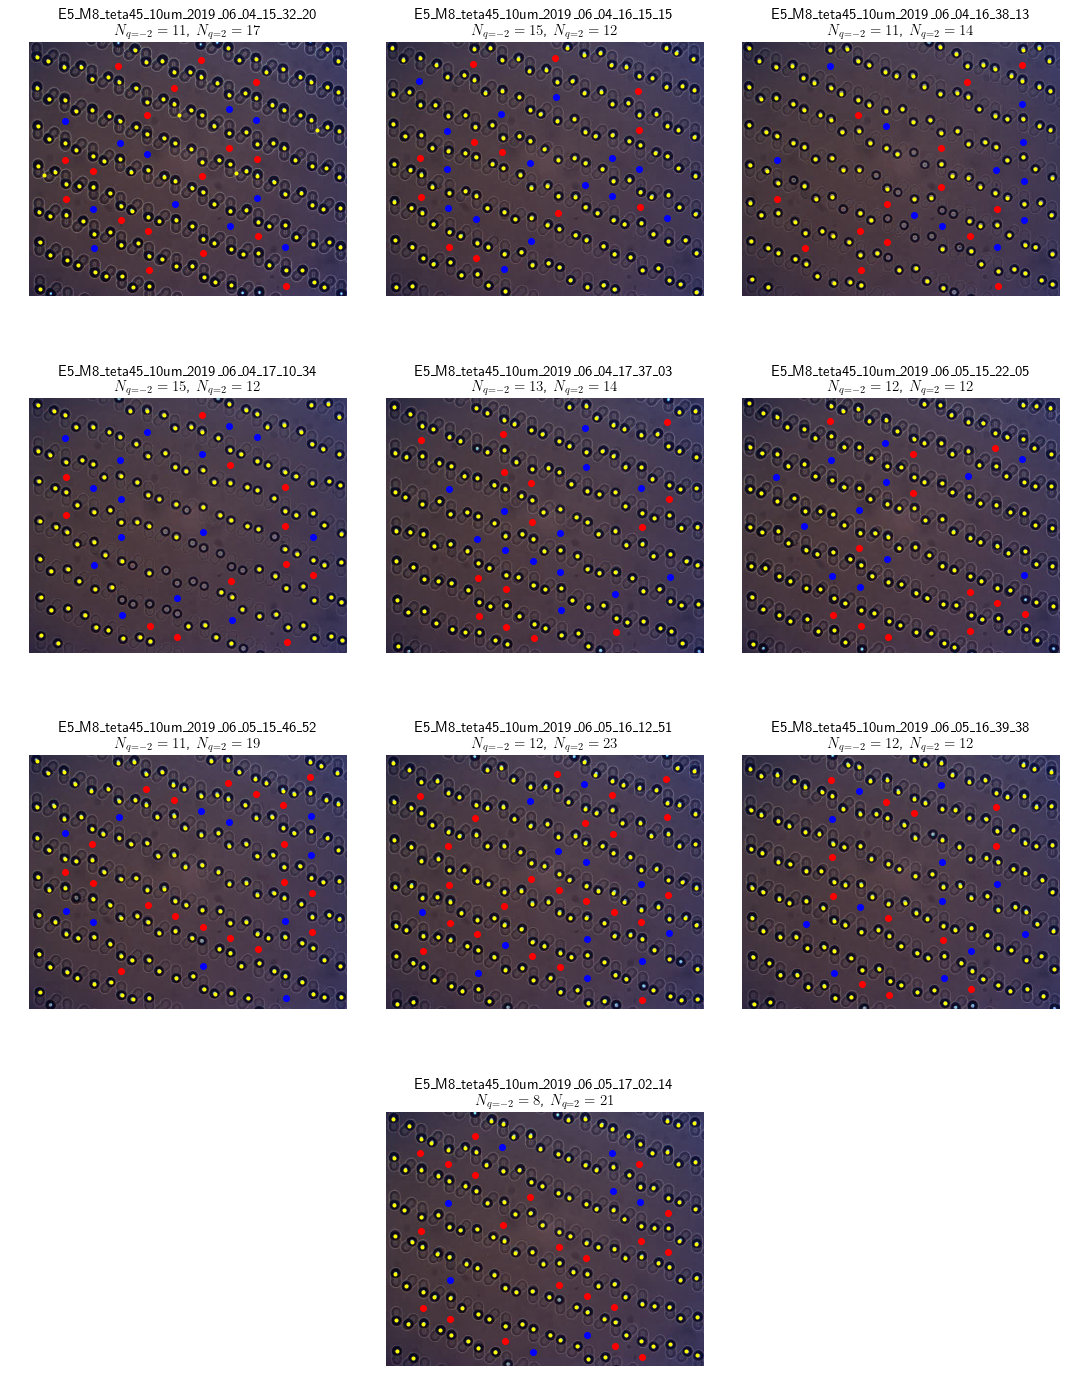

In [13]:
fig, ax = plt.subplots(4,3,figsize=(15,20))

ax.flatten()[-3].remove()
ax.flatten()[-1].remove()
ax = np.delete(ax.flatten(),slice(-3,None,2))

for file_no, name in enumerate(filenames):
    
    
    name = filenames[file_no][:filenames[file_no].find("_vertices.dat")]
    video = pm.open(name+".avi")

    v_frame = vertices.loc[idx[file_no,0],:]
    T5 = v_frame[v_frame.Charge==2]
    T3 = v_frame[v_frame.Charge==-2]

    trj = pd.read_csv(name+"_tracking.dat",sep="\t", index_col=[0,1])
    
    disp_name = os.path.split(name)[1]
    disp_name = disp_name.replace("_","\_")    
    
    ax.flatten()[file_no].imshow(video[0])
    ax.flatten()[file_no].plot(T5.LocationX,T5.LocationY,'o',color="red")
    ax.flatten()[file_no].plot(T3.LocationX,T3.LocationY,'o',color="blue")
    ax.flatten()[file_no].plot(trj.loc[idx[0,:],"x"],trj.loc[idx[0,:],"y"],'.',color = "yellow")
    ax.flatten()[file_no].set_axis_off()
    ax.flatten()[file_no].set_title("%s \n$N_{q=-2} = %u$, $N_{q=2} = %u$"%(disp_name,len(T3),len(T5)),
                                   fontsize=15)
plt.tight_layout()


In [14]:
vertices.loc[idx[:,0],:].groupby("Charge").count()

,id,Coordination,DipoleX,DipoleY,LocationX,LocationY,time,initialtime,field,type
Charge,,,,,,,,,,
-4,34,34,34,34,34,34,34,34,34,34
-2,120,120,120,120,120,120,120,120,120,120
0,237,237,237,237,237,237,237,237,237,237
2,156,156,156,156,156,156,156,156,156,156
4,29,29,29,29,29,29,29,29,29,29
